In [320]:
## loading and preprocessing data
import numpy as np
import pandas as pd 

## visualization of data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## splitting our dataset 
from sklearn.model_selection import train_test_split

## loading the learning alg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#feature engineering
from sklearn.feature_extraction import DictVectorizer

import warnings
warnings.filterwarnings('ignore')
## loading the error metrics
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error,mean_squared_error

In [321]:
df = pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [323]:
df.describe().round()

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


In [324]:
df['price'][df['price'] > 10000000]

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
6    10150000
7    10150000
Name: price, dtype: int64

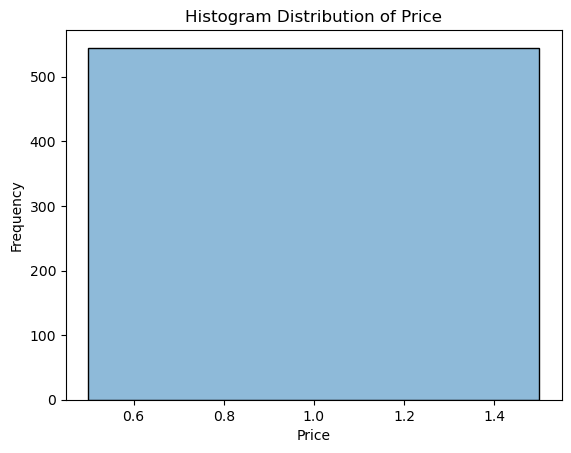

In [325]:
sns.histplot(df['price'] > 100000, kde= True)

plt.title('Histogram Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [326]:
## log transformation 
log_price = np.log1p(df['price'])
log_price

0      16.403275
1      16.321037
2      16.321037
3      16.318175
4      16.250001
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price, Length: 545, dtype: float64

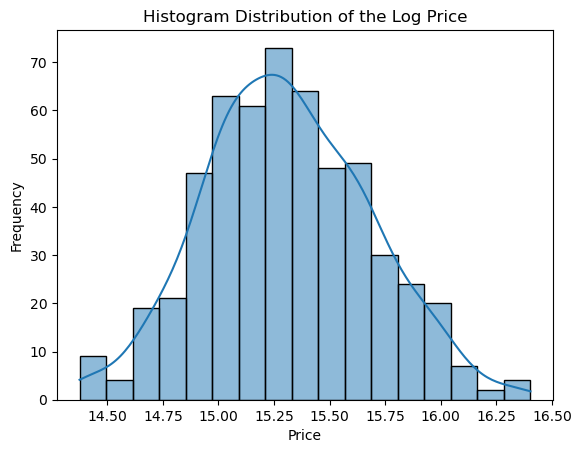

In [327]:
sns.histplot(log_price, kde = True)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


In [328]:
## performing a coorelation on numerical column
## select numerical ..
numerical_cols = df.select_dtypes(exclude=[object])

corr_matrix = numerical_cols.corr().round(2) 

corr_matrix['price']

price        1.00
area         0.54
bedrooms     0.37
bathrooms    0.52
stories      0.42
parking      0.38
Name: price, dtype: float64

<Axes: >

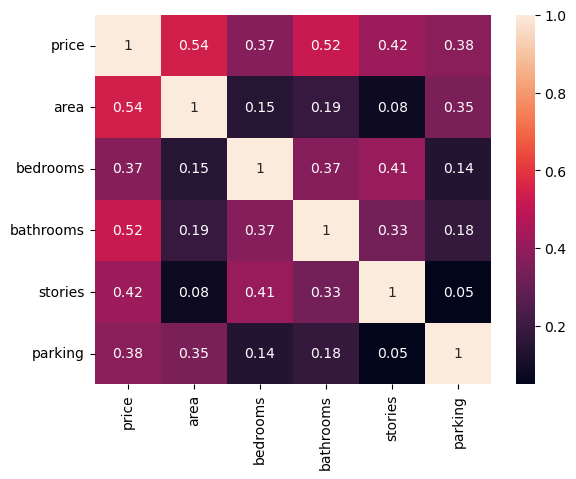

In [329]:
sns.heatmap(corr_matrix, annot= True)

<Axes: xlabel='area'>

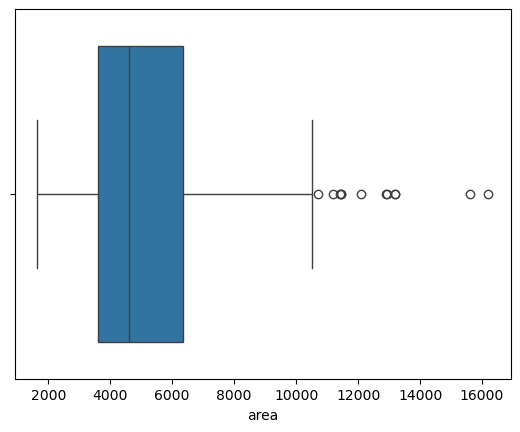

In [330]:
sns.boxplot(data=df, x='area')

In [331]:
df_train, df_test = train_test_split(df,test_size= 0.2, random_state=11)
print(df.shape)
print(df_train.shape)

(545, 13)
(436, 13)


In [332]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
123,5950000,7320,4,2,2,yes,no,no,no,no,0,no,furnished
294,4200000,4000,4,2,2,no,no,no,no,no,0,no,semi-furnished
296,4200000,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
169,5250000,6540,4,2,2,no,no,no,no,yes,0,no,semi-furnished
216,4830000,6040,3,1,1,yes,no,no,no,no,2,yes,semi-furnished


In [333]:
print(f'Train set {len(df_train)}')
print(f'Test set {len(df_test)}')

Train set 436
Test set 109


In [334]:
print(df_train.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [335]:
## selecting target column and converting it to a vector format
#y_train = np.log1p(df_train['price']).values
#y_test = np.log1p(df_test['price']).values
#y_train_full = np.log1p(df_train['price']).values


y_train = np.log1p(df_train['price']).values
y_test = np.log1p(df_test['price']).values

In [336]:
del df_train['price']
del df_test['price']

# Train A Baseline Regression Model

Selecting baseline features (pandas dataframe)
Area
bathrooms	
stories
parking
convert dataframe to matrix/vector format
Train a regression model

In [339]:
baseline_features = ['area', 'bedrooms','bathrooms', 'stories','parking']

df_train_bl = df_train[baseline_features]
df_test_bl = df_test[baseline_features]

In [340]:
df_train_bl.isnull().sum()

area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [341]:
df_test_bl.isnull().sum()

area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [342]:
## convert dataframes to pandas array 
X_train_bl = df_train_bl.values
X_train_bl[:10]

array([[7320,    4,    2,    2,    0],
       [4000,    4,    2,    2,    0],
       [4600,    3,    2,    2,    1],
       [6540,    4,    2,    2,    0],
       [6040,    3,    1,    1,    2],
       [4900,    3,    1,    2,    0],
       [6000,    4,    2,    4,    1],
       [4320,    3,    1,    2,    2],
       [4785,    3,    1,    2,    1],
       [6862,    3,    1,    2,    2]])

In [343]:
## lets train model 
model = LinearRegression() 
model.fit(X_train_bl, y_train)

LinearRegression()

In [344]:
model.coef_

array([6.99032253e-05, 4.28935056e-02, 2.13885145e-01, 1.08165641e-01,
       6.83925558e-02])

In [345]:
model.intercept_

14.309549959517302

In [346]:
df_test_bl.head()

,area,bedrooms,bathrooms,stories,parking
136,5400,4,2,2,2
184,3000,3,2,2,0
375,5960,3,1,2,0
70,4000,3,2,2,0
104,5500,3,2,1,2


In [347]:
## generate validation baseline features 
#df_valid_bl = df_valid[baseline_features]

## convert dataframe into numpy array
X_test_bl = df_test_bl.values 

X_test_bl

array([[ 5400,     4,     2,     2,     2],
       [ 3000,     3,     2,     2,     0],
       [ 5960,     3,     1,     2,     0],
       [ 4000,     3,     2,     2,     0],
       [ 5500,     3,     2,     1,     2],
       [ 8100,     4,     1,     4,     2],
       [ 2910,     2,     1,     1,     0],
       [ 7410,     3,     1,     1,     2],
       [11440,     4,     1,     2,     1],
       [ 3480,     2,     1,     1,     0],
       [ 3840,     3,     1,     2,     1],
       [ 4000,     2,     1,     1,     0],
       [ 3750,     2,     1,     1,     0],
       [ 5720,     2,     1,     2,     0],
       [ 3660,     4,     1,     2,     0],
       [ 4500,     4,     2,     2,     2],
       [ 4100,     3,     2,     3,     2],
       [ 4950,     4,     1,     2,     0],
       [ 3185,     2,     1,     1,     2],
       [ 7980,     3,     1,     1,     1],
       [ 3264,     2,     1,     1,     0],
       [ 4815,     2,     1,     1,     0],
       [ 2325,     3,     1,    

In [348]:
## generate our validation prediction
y_valid_pred = model.predict(X_test_bl)
print(y_valid_pred[0:10])
print(y_test[0:10])

[15.63948808 15.29204172 15.28507013 15.36194495 15.49541926 15.83067293
 14.92080614 15.41504927 15.77942586 14.96065098]
[15.56296994 15.44671016 15.10749451 15.73096165 15.63925323 15.38308447
 14.77255967 15.68345932 15.80925817 15.13593244]


In [349]:
## compute the validation baseline accuracy for 
rmse =  root_mean_squared_error(y_test, y_valid_pred)
mse =  mean_squared_error(y_test, y_valid_pred)
print(f'Baseline Validation Accuracy RMSE: {rmse} and MSE: {mse}')

Baseline Validation Accuracy RMSE: 0.2595066955896558 and MSE: 0.06734372505586227


In [350]:
adjRsq_acc = r2_score(y_test,y_valid_pred)
adjRsq_acc

0.48969157415252207

In [351]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [353]:
## select categoricals 
categorical_features = ['mainroad',	'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
numerical_features =  ['area', 'bedrooms','bathrooms', 'stories','parking']


In [354]:
df[categorical_features + numerical_features]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking
0,yes,no,no,no,yes,yes,furnished,7420,4,2,3,2
1,yes,no,no,no,yes,no,furnished,8960,4,4,4,3
2,yes,no,yes,no,no,yes,semi-furnished,9960,3,2,2,2
3,yes,no,yes,no,yes,yes,furnished,7500,4,2,2,3
4,yes,yes,yes,no,yes,no,furnished,7420,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished,3000,2,1,1,2
541,no,no,no,no,no,no,semi-furnished,2400,3,1,1,0
542,yes,no,no,no,no,no,unfurnished,3620,2,1,1,0
543,no,no,no,no,no,no,furnished,2910,3,1,1,0


In [355]:
## combine of dataframe
df_train_fe = df_train[categorical_features + numerical_features]
df_train_fe.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking
123,yes,no,no,no,no,no,furnished,7320,4,2,2,0
294,no,no,no,no,no,no,semi-furnished,4000,4,2,2,0
296,yes,no,no,no,yes,no,semi-furnished,4600,3,2,2,1
169,no,no,no,no,yes,no,semi-furnished,6540,4,2,2,0
216,yes,no,no,no,no,yes,semi-furnished,6040,3,1,1,2


In [356]:
## convert our dataframe to a list of dict
train_dict_fe = df_train_fe.to_dict(orient='records')

In [357]:
## create an instance of the dict vectorizer 
dv = DictVectorizer()

dv.fit(train_dict_fe)

DictVectorizer()

In [358]:
x_train_fe = dv.transform(train_dict_fe)
x_train_fe

<436x20 sparse matrix of type '<class 'numpy.float64'>'
	with 5232 stored elements in Compressed Sparse Row format>

In [359]:
df_valid_fe = df_test[categorical_features + numerical_features]
df_valid_fe.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking
136,yes,no,no,no,yes,no,unfurnished,5400,4,2,2,2
184,yes,yes,yes,no,no,no,furnished,3000,3,2,2,0
375,yes,yes,yes,no,no,no,unfurnished,5960,3,1,2,0
70,yes,no,yes,no,yes,yes,semi-furnished,4000,3,2,2,0
104,yes,yes,yes,no,no,yes,furnished,5500,3,2,1,2


In [360]:
## convert our dataframe to a list of dict
valid_dict_fe = df_valid_fe.to_dict(orient='records')

In [361]:
x_valid_fe = dv.transform(valid_dict_fe)
x_valid_fe

<109x20 sparse matrix of type '<class 'numpy.float64'>'
	with 1308 stored elements in Compressed Sparse Row format>

In [362]:
#Fitting the Linear Regression Machine Learning model
fe_model = LinearRegression()
fe_model.fit(x_train_fe, y_train)

LinearRegression()

In [363]:
fe_model.intercept_

14.671584821244391

In [364]:
fe_model.coef_

array([-8.35399710e-02,  8.35399710e-02,  4.93824672e-05, -5.09637089e-02,
        5.09637089e-02,  1.72151253e-01,  2.50912376e-02,  3.40370437e-02,
        4.42897645e-02, -7.83268083e-02, -3.54017707e-02,  3.54017707e-02,
       -7.41613670e-02,  7.41613670e-02, -5.75547997e-02,  5.75547997e-02,
        4.75723424e-02, -6.05004199e-02,  6.05004199e-02,  1.00419075e-01])

In [365]:
## lets generate validation predictions
y_valid_predict = fe_model.predict(x_valid_fe) 
print(y_test[0:10])
print(y_valid_predict[0:10])

[15.56296994 15.44671016 15.10749451 15.73096165 15.63925323 15.38308447
 14.77255967 15.68345932 15.80925817 15.13593244]
[15.52064113 15.39990216 15.26155915 15.67681459 15.63908477 15.90720468
 14.69759176 15.61597012 15.77765253 15.08446678]


In [366]:
## compute the validation baseline accuracy for 
rmse =  root_mean_squared_error(y_test, y_valid_predict)
mse =  mean_squared_error(y_test, y_valid_predict)
print(f'Baseline Validation Accuracy RMSE: {rmse} and MSE: {mse}')

Baseline Validation Accuracy RMSE: 0.21175042354547183 and MSE: 0.04483824187168671


In [367]:
adjRsq_acc = r2_score(y_test,y_valid_predict)
adjRsq_acc

0.6602306657624206

In [368]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train_fe, y_train)

RandomForestRegressor(random_state=42)

In [369]:
# generate validation predictions
predictions = random_forest.predict(x_valid_fe)

# Calculate Mean Squared Error
rsquared_acc = r2_score(y_test, predictions)
rsquared_acc

0.6232806781849501

In [370]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

NameError: name 'X_train' is not defined